In [3]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
#dataset = load_dataset('lukebarousse/data_jobs')
#df = dataset['train'].to_pandas()

# Loading Data from CSV
df = pd.read_csv("F:\ALMACENAMIENTO\DATA ANALITYCS\carpeta_extra\job_postings_flat.csv")

#CLEAN UP
# filter job_posted_date for 2025

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df = df[df['job_posted_date'].dt.year == 2025]

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [5]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [6]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [7]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot= df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,word,powerpoint,azure,...,powerbi,digitalocean,openstack,f#,couchdb,msaccess,homebrew,codecommit,kali,ruby on rails
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,2637,2347,1745,1429,1137,1006,944,580,517,234,...,0,0,0,1,0,0,0,1,0,0
2,3130,2609,2193,1950,1545,1033,760,601,555,424,...,0,0,0,0,0,0,0,0,0,0
3,2730,2135,1721,1430,1145,965,1102,571,570,272,...,0,0,0,0,0,0,0,0,0,0
4,1950,1620,1202,1031,984,681,782,403,356,201,...,0,1,0,0,0,0,0,0,0,0
5,1712,1340,1186,919,872,634,644,280,291,196,...,0,0,0,0,0,0,0,0,0,1
6,1823,1386,1119,974,887,548,602,322,315,208,...,1,0,0,0,0,0,0,0,1,0
7,1883,1491,1193,1082,954,680,476,328,314,227,...,0,0,0,0,0,0,0,0,0,0
8,2249,1648,1380,1212,1078,739,606,301,329,251,...,0,0,0,0,0,0,0,0,0,0
9,1261,874,830,686,646,401,310,178,163,169,...,0,0,0,0,0,0,1,0,0,0


In [19]:
#[df_DA_US_pivot.loc['Total'].sort_values(ascending=False)]

In [10]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1     9751
2     9637
3     7907
4     5586
5     5359
6     3919
7     4428
8     5256
9     3001
10    3633
11    3333
12    2495
dtype: int64

In [11]:
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100,axis=0) 

In [12]:
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns=['job_posted_month_no'])

df_DA_US_percent 

job_skills,sql,excel,python,tableau,power bi,r,sas,word,powerpoint,azure,...,powerbi,digitalocean,openstack,f#,couchdb,msaccess,homebrew,codecommit,kali,ruby on rails
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,27.043380,24.069326,17.895600,14.654907,11.660343,10.316891,9.681058,5.948108,5.302020,2.399754,...,0.000000,0.000000,0.000000,0.010255,0.000000,0.00000,0.000000,0.010255,0.000000,0.00000
Feb,32.478987,27.072740,22.756044,20.234513,16.031960,10.719103,7.886272,6.236381,5.759054,4.399709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
Mar,34.526369,27.001391,21.765524,18.085241,14.480840,12.204376,13.937018,7.221449,7.208802,3.439990,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
Apr,34.908700,29.001074,21.518081,18.456856,17.615467,12.191192,13.999284,7.214465,6.373076,3.598281,...,0.000000,0.017902,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
May,31.946259,25.004665,22.130995,17.148722,16.271692,11.830565,12.017167,5.224855,5.430118,3.657399,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.01866
Jun,46.516969,35.366165,28.553202,24.853279,22.633325,13.983159,15.361061,8.216382,8.037765,5.307476,...,0.025517,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025517,0.00000
Jul,42.524842,33.672087,26.942186,24.435411,21.544715,15.356820,10.749774,7.407407,7.091238,5.126468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
Aug,42.789193,31.354642,26.255708,23.059361,20.509893,14.060122,11.529680,5.726788,6.259513,4.775495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
Sep,42.019327,29.123625,27.657448,22.859047,21.526158,13.362213,10.329890,5.931356,5.431523,5.631456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.033322,0.000000,0.000000,0.00000


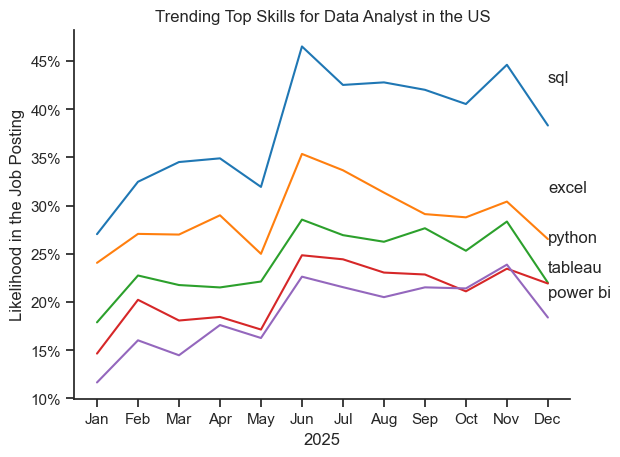

In [18]:
df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False,palette='tab10')
sns.set_theme(style="ticks")
sns.despine()

plt.title('Trending Top Skills for Data Analyst in the US')
plt.ylabel('Likelihood in the Job Posting')
plt.xlabel('2025')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11, df_plot.iloc[-5,i], df_plot.columns[i])

plt.show()